In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
MiddleEast_countries = pd.DataFrame(pd.read_csv('C:/Program Files/PostgreSQL/15/data/data_copy/Middle Eastern countries.csv'))

MiddleEast_countries.head()

,Country,Year,Population
0,Aruba,NaN,104257.0
1,Africa Eastern and Southern,NaN,600008424.0
2,Afghanistan,NaN,33753499.0
3,Africa Western and Central,NaN,408690375.0
4,Angola,NaN,28127721.0


In [3]:
MiddleEast_countries.tail()

,Country,Year,Population
359,Oman,2022.0,4576298.0
360,Qatar,2022.0,2695122.0
361,Saudi Arabia,2022.0,36408820.0
362,Syrian Arab Republic,2022.0,22125249.0
363,"Yemen, Rep.",2022.0,33696614.0


In [4]:
MiddleEast_countries.sample(10)

,Country,Year,Population
100,Haiti,NaN,1.056376e+07
358,Lebanon,2022.0,5.489739e+06
106,Indonesia,NaN,2.590920e+08
339,"Iran, Islamic Rep.",2021.0,8.792343e+07
131,Liberia,NaN,4.612329e+06
104,IDA total,NaN,1.576578e+09
0,Aruba,NaN,1.042570e+05
222,Slovenia,NaN,2.063531e+06
127,Kuwait,2015.0,3.908743e+06
264,Zambia,NaN,1.624823e+07


In [5]:
MiddleEast_countries.dtypes

Country        object
Year          float64
Population    float64
dtype: object

In [6]:
MiddleEast_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     364 non-null    object 
 1   Year        112 non-null    float64
 2   Population  363 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


In [7]:

#Remove empty values in table
MiddleEast_countries=MiddleEast_countries.dropna()

#Remove duplicates
MiddleEast_countries=MiddleEast_countries.drop_duplicates(subset=['Country','Year','Population'])

#Right Type
MiddleEast_countries['Year']=MiddleEast_countries['Year'].astype(int)
MiddleEast_countries['Population']=MiddleEast_countries['Population'].astype(int)

#Update table to make it easy to join
MiddleEast_countries.loc[MiddleEast_countries['Country']=='Yemen, Rep.','Country']='Yemen'
MiddleEast_countries.loc[MiddleEast_countries['Country']=='Iran, Islamic Rep.','Country'] = 'Iran'
MiddleEast_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 8 to 363
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     112 non-null    object
 1   Year        112 non-null    int32 
 2   Population  112 non-null    int32 
dtypes: int32(2), object(1)
memory usage: 2.6+ KB


In [8]:
Female_parliament_held = pd.DataFrame(pd.read_csv('C:/Program Files/PostgreSQL/15/data/data_copy/African women in parliament.csv'))
Female_parliament_held.head()

,Country,Year,Last_Election_Date,Value
0,Bahrain,2005,2018-11,0.0
1,Bahrain,2010,2018-11,2.5
2,Bahrain,2015,2018-11,7.5
3,Bahrain,2018,2018-11,7.5
4,Bahrain,2019,2018-11,15.0


In [9]:
Female_parliament_held.tail()

,Country,Year,Last_Election_Date,Value
115,Yemen,2018,2003-04,0.0
116,Yemen,2019,2003-04,0.3
117,Yemen,2020,2003-04,0.3
118,Yemen,2021,2003-04,0.3
119,Yemen,2022,2003-04,0.0


In [10]:
Female_parliament_held.sample(10)

,Country,Year,Last_Election_Date,Value
94,Syrian Arab Republic,2005,2020-07,12.0
40,Israel,2020,2021-03,23.3
7,Bahrain,2022,2018-11,15.0
3,Bahrain,2018,2018-11,7.5
10,Cyprus,2010,2021-05,12.5
15,Cyprus,2021,2021-05,21.4
11,Cyprus,2015,2021-05,12.5
103,United Arab Emirates,2005,2019-10,0.0
95,Syrian Arab Republic,2010,2020-07,12.4
109,United Arab Emirates,2021,2019-10,50.0


In [11]:
Female_parliament_held['Value'] = Female_parliament_held['Value'].astype(int)
Female_parliament_held.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             120 non-null    object
 1   Year                120 non-null    int64 
 2   Last_Election_Date  120 non-null    object
 3   Value               120 non-null    int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 3.4+ KB


In [12]:
Female_parliament_held.describe()

,Year,Value
count,120.000000,120.000000
mean,2015.083333,10.691667
std,6.914342,10.677705
min,2000.000000,0.000000
25%,2010.000000,2.000000
50%,2018.000000,8.000000
75%,2020.000000,17.000000
max,2022.000000,50.000000


In [13]:

#Remove duplicates
Female_parliament_held=Female_parliament_held.drop_duplicates(subset=['Country','Year','Value'])

#Filter to include only 2015 upward
Female_parliament_held= Female_parliament_held[Female_parliament_held['Year']>=2015]

#Filter country column to make it easy to join table
Female_parliament_held.loc[Female_parliament_held['Country']=='Iran (Islamic Republic of)','Country']='Iran'
Female_parliament_held

,Country,Year,Last_Election_Date,Value
2,Bahrain,2015,2018-11,7
3,Bahrain,2018,2018-11,7
4,Bahrain,2019,2018-11,15
5,Bahrain,2020,2018-11,15
6,Bahrain,2021,2018-11,15
...,...,...,...,...
115,Yemen,2018,2003-04,0
116,Yemen,2019,2003-04,0
117,Yemen,2020,2003-04,0
118,Yemen,2021,2003-04,0


In [14]:
#Time for Analysis

#To get the Value from one table to the other i need to merge them togther

join_both=pd.merge(MiddleEast_countries,Female_parliament_held, on=['Country','Year'])
val=join_both.sort_values(['Value'], ascending=False)
join_both.loc[:,['Country','Year','Population','Value']].sort_values(['Country','Year'],ascending=[False,False])


##"""Is really amazing with the growth of women that held parliamentary postions in UAE, each
##year there is growth. 2015 the number was 18, 2019 it grew to 23 and in 2022 it skyrocketed to
##50. While the United Arab Emirates (UAE) does have a cultural and religious context that 
##might seem conservative in terms of gender roles, it's important to note that the UAE has
##also taken steps to promote women's participation in various sectors, including politics.

##Other countries like Isreal,Iraq,Cyprus,Bahrain and Saudi Arabia a little similarity.
##While Qatar drop from 10 to 4 is alarming. Kuwait drop from 6 in 2020 to 2 in 2022 is also 
##alarming. Finaly, Yemen no human base on the dataset have held a parliament postion from 2015
##-2022 Why? 

##While Yemen has ratified international human rights treaties, including the
##Convention on the Elimination of All Forms of Discrimination Against Women (CEDAW), 
##domestic laws and policies may not fully reflect these commitments. Legal barriers,
##such as discriminatory family laws and 
##inheritance practices, can impact women's ability to engage in politics and public life

##https://www2.ohchr.org/english/bodies/hrc/docs/ngos/
##Yemen's%20darkside-discrimination_Yemen_HRC101.pdf. """

,Country,Year,Population,Value
83,Yemen,2022,33696614,0
69,Yemen,2021,32981641,0
55,Yemen,2020,32284046,0
41,Yemen,2019,31546691,0
27,Yemen,2018,30790513,0
...,...,...,...,...
57,Bahrain,2021,1463265,15
43,Bahrain,2020,1477469,15
29,Bahrain,2019,1494188,15
15,Bahrain,2018,1487340,7


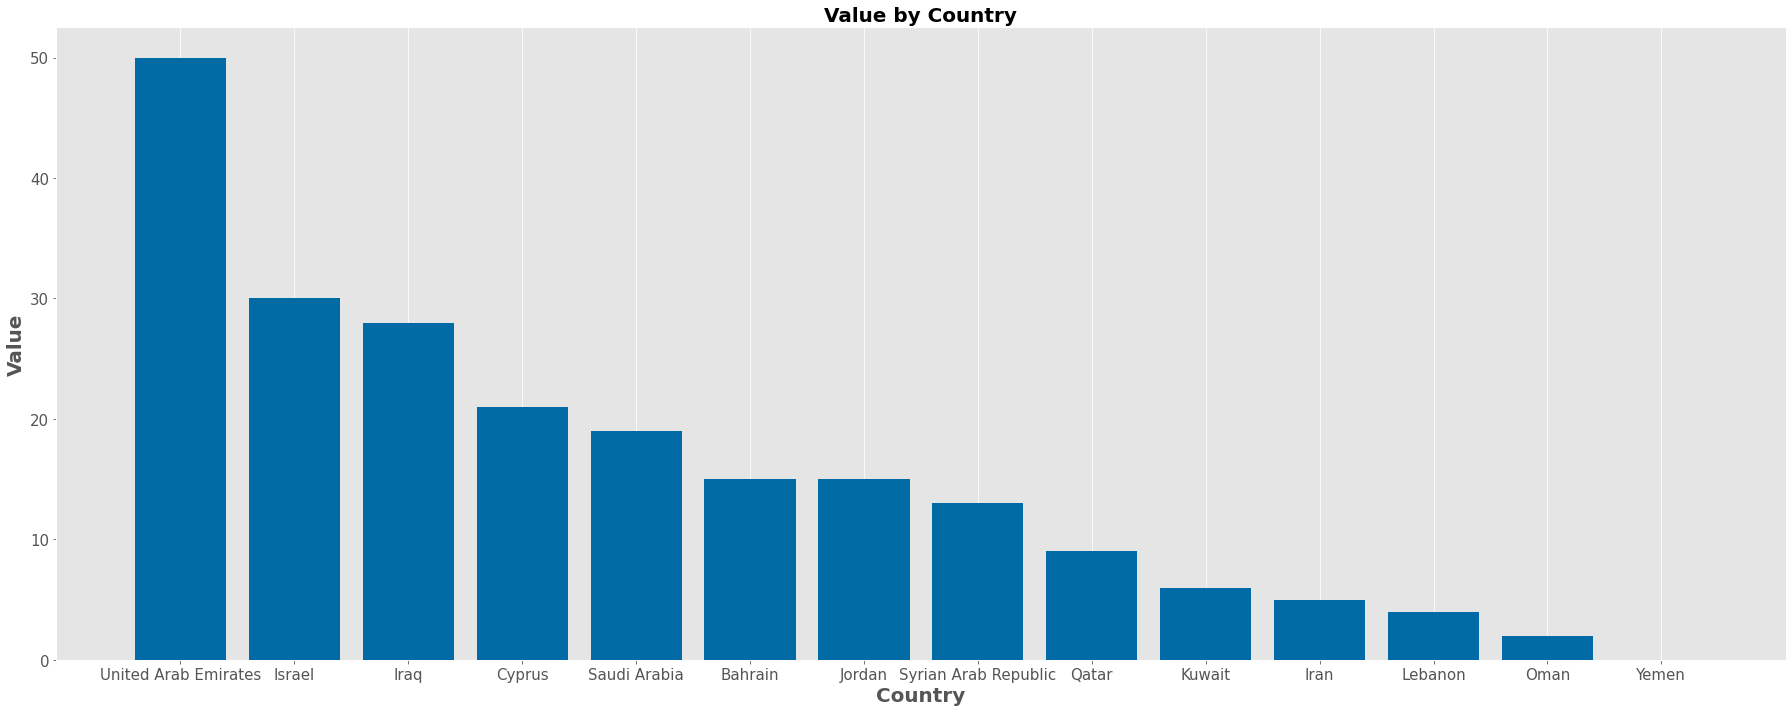

In [43]:
#visual for the above analysis
plt.style.available

plt.style.use('ggplot')
plt.style.use('tableau-colorblind10')

fig, axes = plt.subplots(1,1, figsize=(25,10))
axes.bar(val['Country'], val['Value'])
axes.set_xlabel('Country', fontsize=20, fontweight='bold')
axes.set_ylabel('Value', fontsize=20, fontweight='bold')
axes.set_title('Value by Country', fontsize = 20, fontweight = 'bold')
axes.tick_params(axis='both', labelsize=15)
axes.grid(axis='y')

# Adjust layout and display the plots
fig.tight_layout()
plt.show()

#fig.savefig('C:/Analysis/Value by Country.png', dpi =300)


In [17]:
sum_both = join_both.groupby('Country') [['Population', 'Value']].agg(np.sum)
sum_pop = sum_both.sort_values(['Population'],ascending=False)
sum_val = sum_both.sort_values(['Value'],ascending=False)

sum_both
#In the UAE, the growth of women in parliamentary positions is impressive, increasing from 18 in 2015 to 50 in 2022, 
#showcasing progress despite cultural factors. Similar trends are seen in Israel, Iraq, Cyprus, Bahrain, and Saudi Arabia, 
#but Qatar's drop to 4 and Kuwait's decline to 2 by 2022 are concerning. Surprisingly, Yemen has very little percentage of 
#women in parliament from 2015 to 2022, potentially due to legal and cultural barriers despite international commitments


,Population,Value
Country,,
Bahrain,8756637,74
Cyprus,7368160,100
Iran,517736800,28
Iraq,250498731,156
Israel,54447300,157
Jordan,64015662,80
Kuwait,25546459,16
Lebanon,34876979,22
Oman,27035869,9


In [18]:
sum_pop

,Population,Value
Country,,
Iran,517736800,28
Iraq,250498731,156
Saudi Arabia,211951666,114
Yemen,189816050,0
Syrian Arab Republic,122859103,72
Jordan,64015662,80
United Arab Emirates,55362288,211
Israel,54447300,157
Lebanon,34876979,22


In [19]:
sum_val

,Population,Value
Country,,
United Arab Emirates,55362288,211
Israel,54447300,157
Iraq,250498731,156
Saudi Arabia,211951666,114
Cyprus,7368160,100
Jordan,64015662,80
Bahrain,8756637,74
Syrian Arab Republic,122859103,72
Qatar,16132282,40


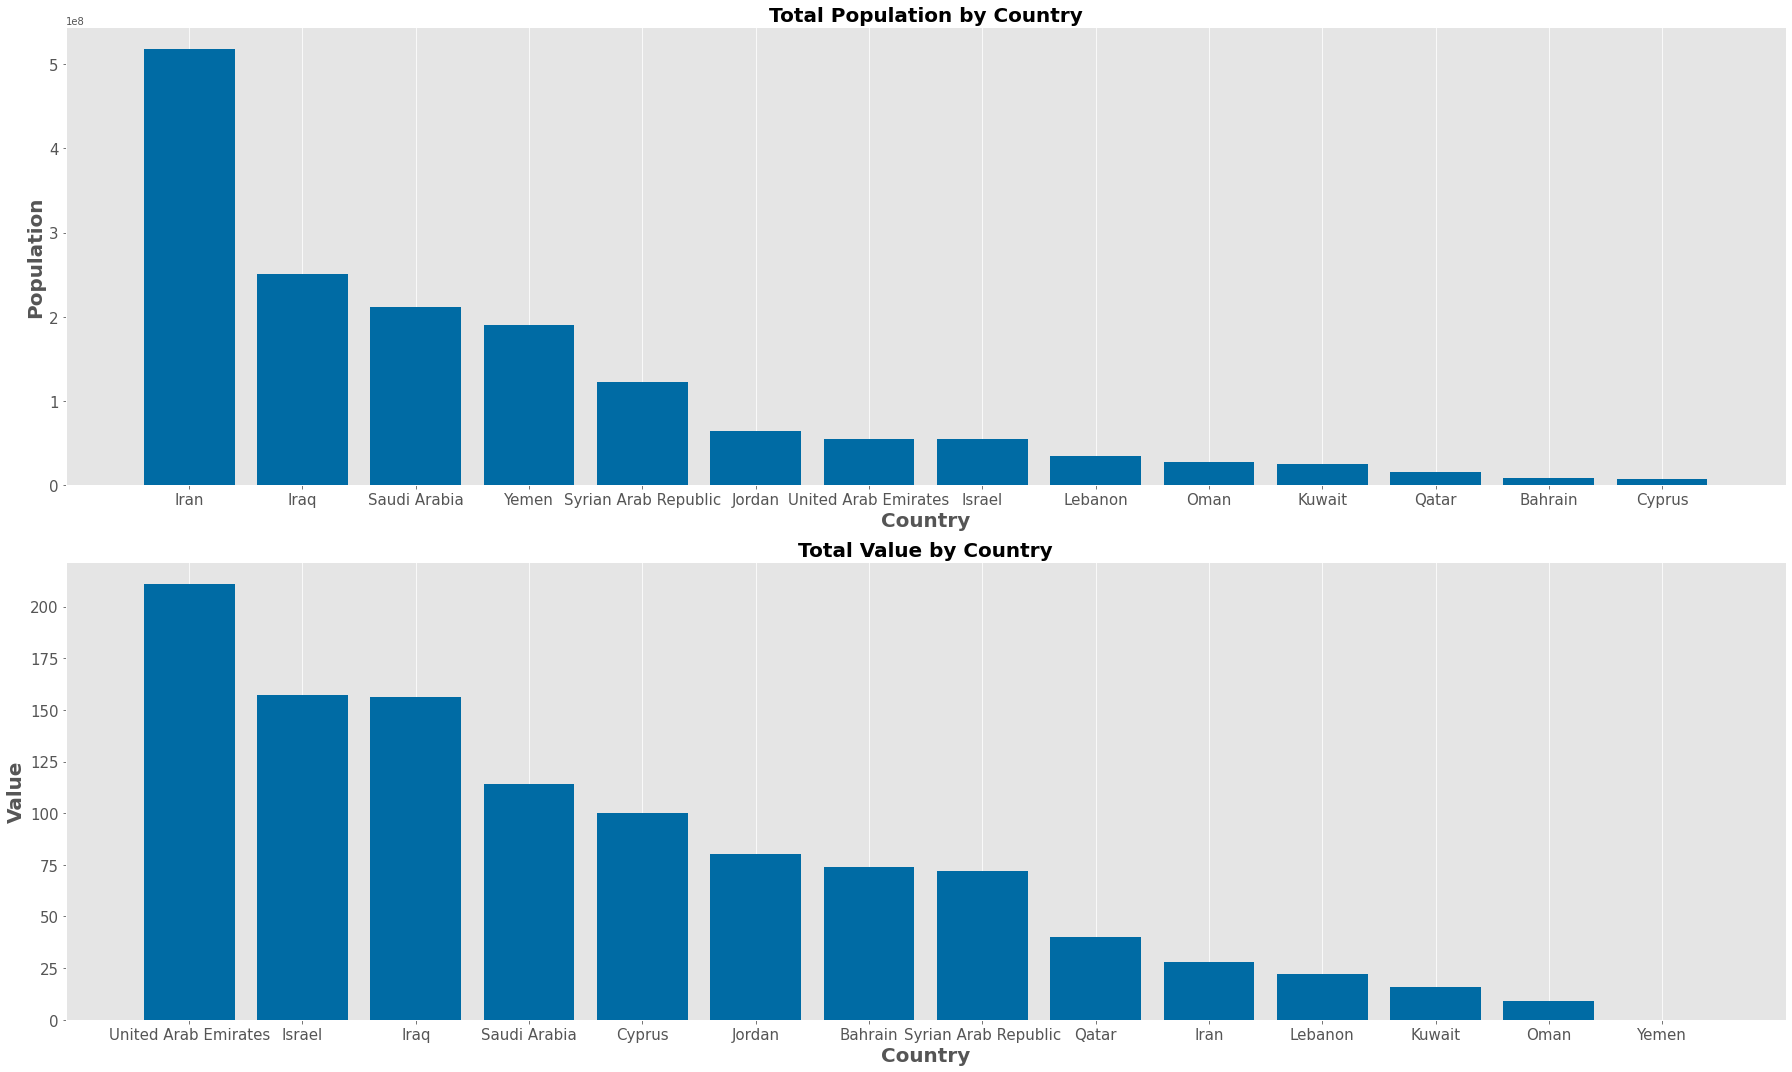

In [33]:
#Visual for the above analysis
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(25,15))

ax1.bar(sum_pop.index, sum_pop['Population'])
ax1.set_xlabel('Country', fontsize=20, fontweight='bold')
ax1.set_ylabel('Population', fontsize=20, fontweight='bold')
ax1.set_title('Total Population by Country', fontsize=20, fontweight = 'bold')
ax1.tick_params(axis='both', labelsize=15)
ax1.grid(axis='y' )

ax2.bar(sum_val.index, sum_val['Value'])
ax2.set_xlabel('Country', fontsize=20, fontweight='bold')
ax2.set_ylabel('Value', fontsize=20, fontweight='bold')
ax2.set_title('Total Value by Country', fontsize=20, fontweight = 'bold')
ax2.tick_params(axis='both', labelsize=15)
ax2.grid(axis= 'y')

fig.tight_layout()
plt.show()

In [34]:
x= join_both.groupby(['Country', 'Year']) [['Value','Population']].agg(np.max).sort_values('Population',ascending=False)
x
#Analyzing the data, Iran stands out as the Middle Eastern country with the 
#highest population in 2022, reaching 88,550,570, yet only 6 women held positions 
#in parliament. Following closely is Iraq, with a population of 44,496,122, where 
#29 women held parliamentary positions. On the other end, Cyprus, with the smallest 
#population, had 13 women holding parliamentary positions.

Value  Population
Country Year                   
Iran    2022      5    88550570
        2021      5    87923432
        2020      5    87290193
        2019      5    86564202
        2018      5    85617562
...             ...         ...
Cyprus  2021     21     1244188
        2020     19     1237537
        2019     17     1228836
        2018     17     1218831
        2015     12     1187280

[84 rows x 2 columns]

In [35]:
x= join_both.groupby('Country') ['Value'].agg([np.mean,np.median]).sort_values('Country')
x
#it shows that UAE have a high average and median of 35 & 36 follow by Isreal and Iraq 
#with 27 & 26 respectively and yemen wih 0 average


,mean,median
Country,,
Bahrain,12.333333,15.0
Cyprus,16.666667,17.0
Iran,4.666667,5.0
Iraq,26.000000,26.0
Israel,26.166667,26.5
Jordan,13.333333,13.5
Kuwait,2.666667,2.0
Lebanon,3.666667,4.0
Oman,1.500000,1.5


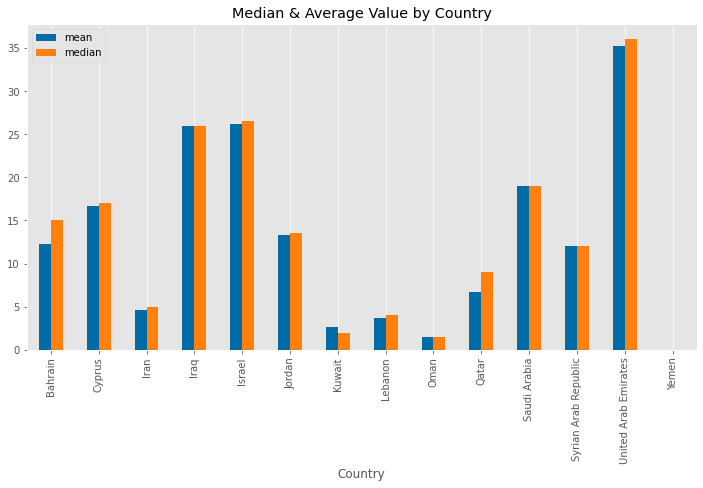

In [38]:
plt.style.available
x.plot(kind='bar', figsize = (12,6), title='Median & Average Value by Country')
plt.grid(axis='y')
plt.show()

In [40]:
y=join_both.groupby('Year') [['Value']].agg([np.mean,np.median]).sort_values('Year',ascending=False)
y

#In the 2020 women held more parliamentary position, shift front to 2022 and we are short 
#of 10 numbers. The dataset shows that as the world is becoming more modernalized, women have
#the right to be voted for too.

Value       
           mean median
Year                  
2022  13.928571   11.5
2021  14.285714   11.0
2020  14.642857   13.5
2019  12.714286   14.0
2018  11.857143   11.0
2015   9.642857    9.5

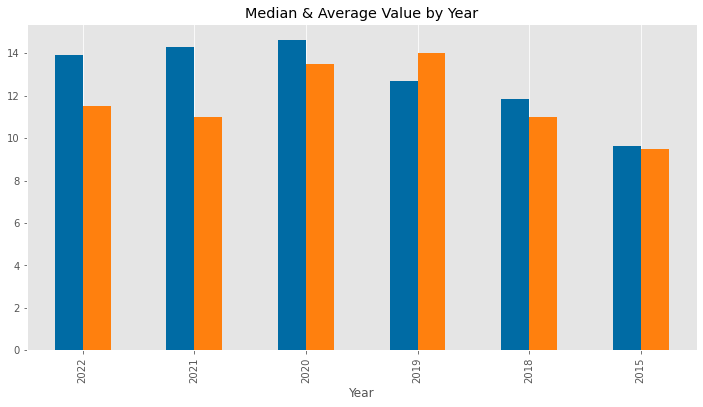

In [41]:
y.plot(kind='bar', figsize = (12,6), title='Median & Average Value by Year', legend= False)
plt.grid(axis='y')
plt.show()

In [42]:
join_both.groupby(['Country', 'Last_Election_Date']) [['Value']].agg(np.sum).sort_values('Last_Election_Date')

#The last election date in UAE with the highest total of 213 is 2019-10 while in Yemen
#election was last held in 2003-04 with 1 total

,,Value
Country,Last_Election_Date,
Yemen,2003-04,0
Lebanon,2018-05,22
Bahrain,2018-11,74
Oman,2019-10,9
United Arab Emirates,2019-10,211
Iran,2020-02,28
Syrian Arab Republic,2020-07,72
Saudi Arabia,2020-10,114
Jordan,2020-11,80
